In [16]:
from tools import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
from scipy import interpolate
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('expand_frame_repr', False)
qa_met = 'QA_metadata_tabDelimited.txt'

In [17]:
simplified = metadata_simplification(qa_met)
simplified

,ProcessDataID,CodeName,cathodeMass
0,1012915.0,QA_85_14,18.136944
1,844856.0,QA_53_1,18.439984
2,231580.0,QA_13_1,28.088160
3,231766.0,QA_14_8,28.273980
4,844841.0,QA_55_14,18.932424
...,...,...,...
1115,869192.0,QA_67_7,29.115060
1116,849394.0,QA_59_4,19.352454
1117,1011020.0,QA_87_12,18.136944
1118,1001061.0,QA_77_3,18.193764


In [18]:
path_list = path_listing(r'C:\Users\cjang.WILDCAT\Desktop\data_driven\CJ_work')
ids = []
for i in path_list:
    up1 = i.strip('ProcessDataID_')
    no = up1.strip('_tabDelimited.txt')
    ids.append(float(no))
    #print(float(no))

In [33]:
#Development Interpolation Function
def interp(inpt, qa_met):
    simplified = metadata_simplification(qa_met)
    df = pd.read_csv(inpt, sep = "\t")
    i = list(simplified['ProcessDataID'])
    df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][1])].cathodeMass
    df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
    df = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
    df = df[df['Step'] == "ApplyCurrent"]
    cycle_ten = df[df['Cycle'] == 10]
    cycle_hun = df[df['Cycle'] == 100]

    tenth_dis = cycle_ten[(cycle_ten['State'] == 'Discharge')]
    tenth_charge = cycle_ten[(cycle_ten['State'] == 'Charge')]

    hundth_dis = cycle_hun[(cycle_hun['State'] == 'Discharge')]
    hundth_charge = cycle_hun[(cycle_hun['State'] == 'Charge')]

    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

    fp = hundth_dis['divided']
    xp = hundth_dis['Voltage_V']
    new_vals = tenth_dis['Voltage_V']
    f = interpolate.interp1d(xp,fp,fill_value='extrapolate')
    tenth_dis['interp_divided'] = list(f(new_vals))
    tenth_dis['difference'] = abs(tenth_dis['divided'] - tenth_dis['interp_divided'])

    fpc = hundth_charge['divided']
    xpc = hundth_charge['Voltage_V']
    new_valsc = tenth_charge['Voltage_V']
    fc = interpolate.interp1d(xpc,fpc,fill_value='extrapolate')
    tenth_charge['interp_divided'] = list(fc(new_valsc))
    tenth_charge['difference'] = abs(tenth_charge['divided'] - tenth_charge['interp_divided'])


    fig, ax = plt.subplots()
    plt.title(inpt)
    ax.plot(tenth_charge['Voltage_V'], tenth_charge['difference'], "-b", label = 'Charge Difference')
    ax.plot(tenth_dis['Voltage_V'], tenth_dis['difference'], "--r", label = 'Discharge Difference')
    leg = ax.legend()
def interp_rev(inpt, qa_met):
    simplified = metadata_simplification(qa_met)
    df = pd.read_csv(inpt, sep = "\t")
    i = list(simplified['ProcessDataID'])
    df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][1])].cathodeMass
    df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
    df = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
    df = df[df['Step'] == "ApplyCurrent"]
    cycle_ten = df[df['Cycle'] == 10]
    cycle_hun = df[df['Cycle'] == 100]

    tenth_dis = cycle_ten[(cycle_ten['State'] == 'Discharge')]
    tenth_charge = cycle_ten[(cycle_ten['State'] == 'Charge')]

    hundth_dis = cycle_hun[(cycle_hun['State'] == 'Discharge')]
    hundth_charge = cycle_hun[(cycle_hun['State'] == 'Charge')]

    figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')


    #Interpolation extrapolates the tenth discharge/charge and projects the hundredth onto it
    #take the difference
    fp = tenth_dis['divided']
    xp = tenth_dis['Voltage_V']
    new_vals = hundth_dis['Voltage_V']
   
    f = interpolate.interp1d(xp,fp,fill_value='extrapolate')
    hundth_dis['interp_divided'] = list(f(new_vals))
    hundth_dis['difference'] = abs(hundth_dis['divided'] - hundth_dis['interp_divided'])

    fpc = tenth_charge['divided']
    xpc = tenth_charge['Voltage_V']
    new_valsc = hundth_charge['Voltage_V']
    fc = interpolate.interp1d(xpc,fpc,fill_value='extrapolate')
    hundth_charge['interp_divided'] = list(fc(new_valsc))
    hundth_charge['difference'] = abs(hundth_charge['divided'] - hundth_charge['interp_divided'])


    fig, ax = plt.subplots()
    plt.title(inpt)
    ax.plot(hundth_charge['Voltage_V'], hundth_charge['difference'], "-b", label = 'Charge Difference')
    ax.plot(hundth_dis['Voltage_V'], hundth_dis['difference'], "--r", label = 'Discharge Difference')
    leg = ax.legend()

<Figure size 800x800 with 0 Axes>

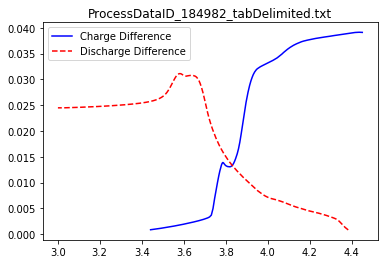

In [34]:
interp_rev(path_list[0], qa_met)

<Figure size 800x800 with 0 Axes>

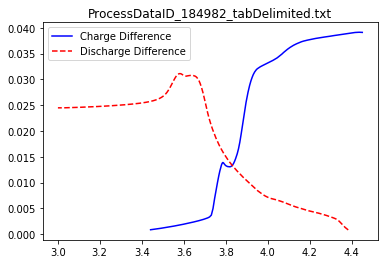

<Figure size 800x800 with 0 Axes>

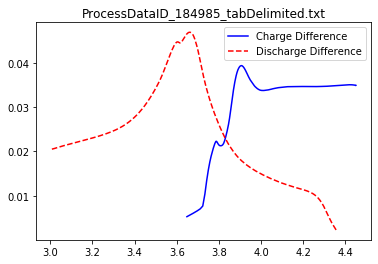

<Figure size 800x800 with 0 Axes>

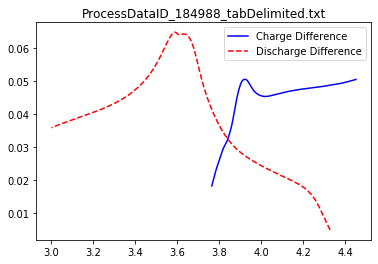

<Figure size 800x800 with 0 Axes>

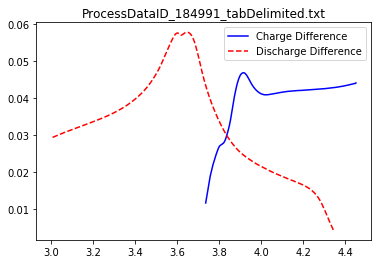

<Figure size 800x800 with 0 Axes>

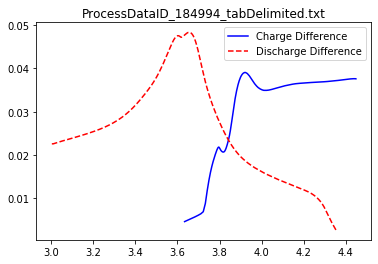

<Figure size 800x800 with 0 Axes>

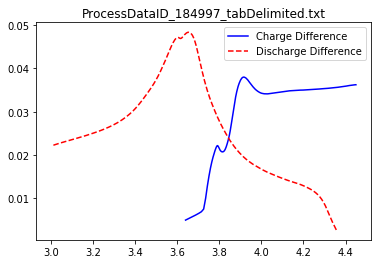

<Figure size 800x800 with 0 Axes>

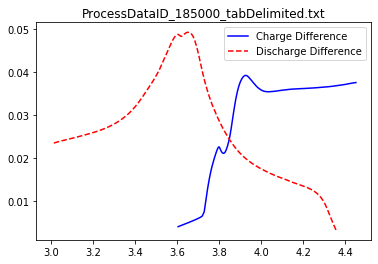

<Figure size 800x800 with 0 Axes>

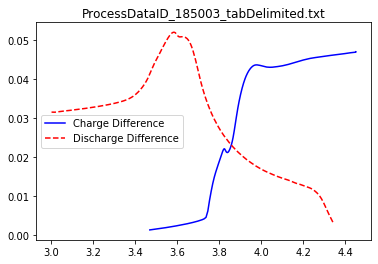

<Figure size 800x800 with 0 Axes>

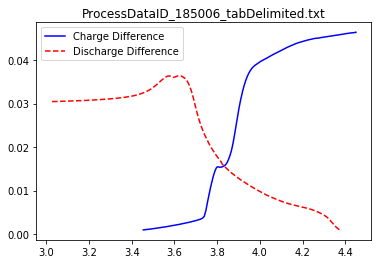

<Figure size 800x800 with 0 Axes>

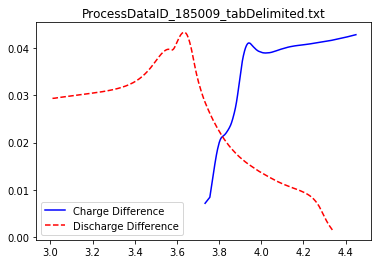

<Figure size 800x800 with 0 Axes>

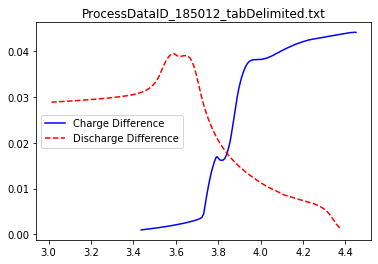

<Figure size 800x800 with 0 Axes>

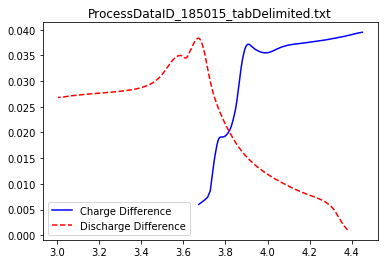

<Figure size 800x800 with 0 Axes>

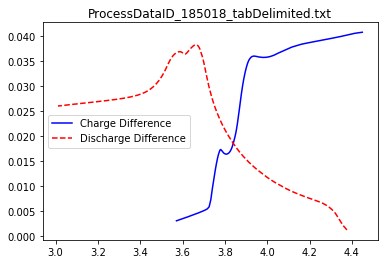

<Figure size 800x800 with 0 Axes>

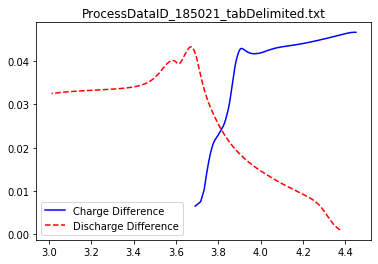

<Figure size 800x800 with 0 Axes>

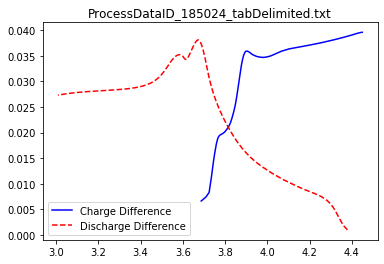

<Figure size 800x800 with 0 Axes>

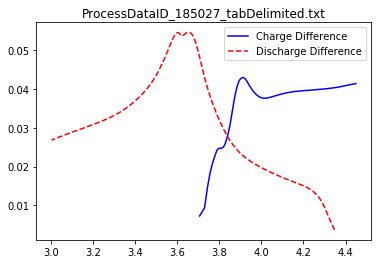

In [12]:
for i in path_list:
    interp_rev(i, qa_met)

In [35]:
from scipy.interpolate import UnivariateSpline
x =  np.linspace(0, 10, 70)
y =  np.linspace(0, 10, 70)
spl = UnivariateSpline(x, y, k=4, s=0)

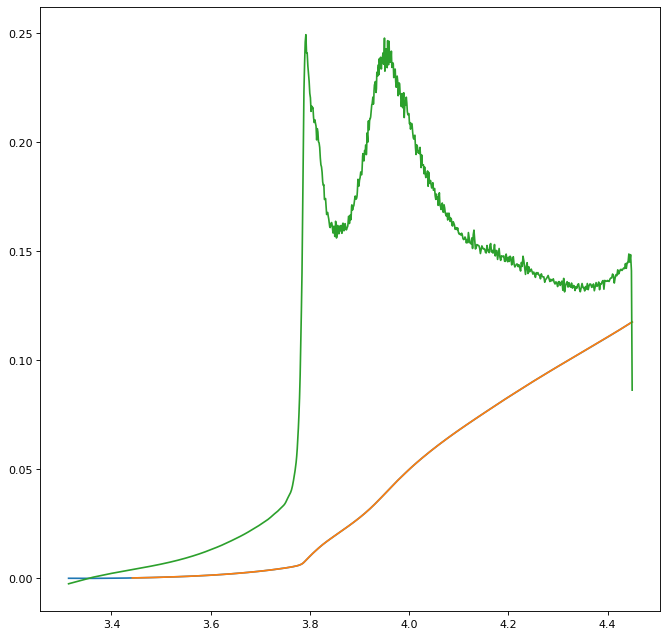

In [95]:
simplified = metadata_simplification(qa_met)
df = pd.read_csv(path_list[0], sep = "\t")
i = list(simplified['ProcessDataID'])
df['cathodeMass'] = np.ones(len(df)) * simplified.iloc[i.index(df['ProcessDataID'][1])].cathodeMass
df['divided'] = df['StateCapacity_mAh']/df['cathodeMass']
df = df[['ProcessDataID', 'StepNumber', 'Cycle', 'Step','State', 'Voltage_V', 'cathodeMass', 'StateCapacity_mAh', 'divided']]
df = df[df['Step'] == "ApplyCurrent"]
cycle_ten = df[df['Cycle'] == 10]
cycle_hun = df[df['Cycle'] == 100]

tenth_dis = cycle_ten[(cycle_ten['State'] == 'Discharge')]
tenth_charge = cycle_ten[(cycle_ten['State'] == 'Charge')]

hundth_dis = cycle_hun[(cycle_hun['State'] == 'Discharge')]
hundth_charge = cycle_hun[(cycle_hun['State'] == 'Charge')]

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

fp = hundth_charge['divided']
xp = hundth_charge['Voltage_V']
new_vals = tenth_charge['Voltage_V']
f = UnivariateSpline(xp, fp, k = 4, s = 0)
plt.plot(new_vals, f(new_vals))
plt.plot(xp, fp)
plt.plot(new_vals, f.derivative(1)(new_vals))

In [94]:
f.derivative(1)(new_vals)

array([-0.00241974,  0.00057376,  0.00232685,  0.00359879,  0.00465431,
        0.00561269,  0.00653268,  0.00744677,  0.00836688,  0.0093085 ,
        0.01026881,  0.01124498,  0.0122438 ,  0.01326264,  0.01426454,
        0.01525995,  0.01628336,  0.01730738,  0.01830228,  0.01928608,
        0.02027107,  0.02127157,  0.0222984 ,  0.02328081,  0.02421799,
        0.02519027,  0.02615245,  0.02703941,  0.02800357,  0.02893529,
        0.0296378 ,  0.03013453,  0.03051747,  0.03083168,  0.03109531,
        0.03132385,  0.0315385 ,  0.03174002,  0.0319413 ,  0.03213132,
        0.03232053,  0.03250741,  0.03268969,  0.03287532,  0.0330622 ,
        0.03325134,  0.03345969,  0.03368392,  0.03394264,  0.03424508,
        0.0345841 ,  0.03497033,  0.03539239,  0.03584904,  0.03633455,
        0.03682007,  0.03727437,  0.03770989,  0.0380984 ,  0.03848838,
        0.03890086,  0.03938117,  0.03992867,  0.04061192,  0.04145154,
        0.04247896,  0.04363036,  0.04492763,  0.04634686,  0.04